In [ ]:
! pip install networkx
! pip install plotly
! pip install colorlover
! pip install NRCLex

     |████████████████████████████████| 396 kB 8.3 MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=48ec703694a10247bfc1c704926ffbe0bc9e8c1bb9068b5206d18a55a32854d8
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built NRCLex


# Introduction to NetworkX

In [ ]:
import networkx as nx

## Creating a graph

In [ ]:
G = nx.Graph()

In [ ]:
# add nodes
G.add_node(234)
G.add_node("hello")

# add an edge between nodes
G.add_edge(234,"hello")

In [ ]:
print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: [234, 'hello']
Edges: [(234, 'hello')]


In [ ]:
G[234]

AtlasView({'hello': {}})

In [ ]:
G['hello']

AtlasView({234: {}})

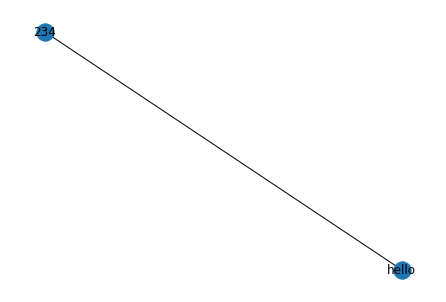

In [ ]:
nx.draw(G, with_labels=True)

## Properties on edges

In [ ]:
# Option 1
G.add_edge('Alice', 'Bob')
G['Alice']['Bob']['know'] = 10
G['Alice']['Bob']['friends'] = 5

In [ ]:
# Option 2
G.add_edges_from([('Alice', 'Bob', {'know': 10, 'friends': 5})])

In [ ]:
print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: [234, 'hello', 'Alice', 'Bob']
Edges: [(234, 'hello'), ('Alice', 'Bob')]


In [ ]:
G['Bob']

AtlasView({'Alice': {'know': 10, 'friends': 5}})

In [ ]:
G['Alice']

AtlasView({'Bob': {'know': 10, 'friends': 5}})

In [ ]:
G['Bob']['Alice']['know'] += 1

In [ ]:
G['Alice']

AtlasView({'Bob': {'know': 11, 'friends': 5}})

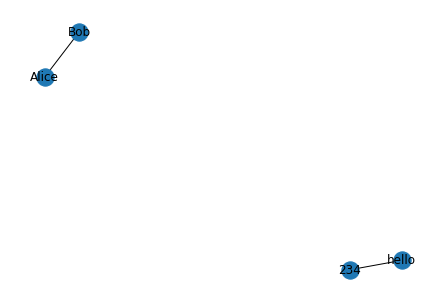

In [ ]:
nx.draw(G, with_labels=True)

## Analyzing graphs

In [ ]:
G.add_edge('Alice', 'Carlos')
G.add_edge('Carlos', 'Dave')
G.add_edge('Dave', 'Bob')
G.add_edge('Alice', 'Eve')

In [ ]:
components = nx.connected_components(G)
list(components)

[{234, 'hello'}, {'Alice', 'Bob', 'Carlos', 'Dave', 'Eve'}]

In [ ]:
nx.degree(G)

DegreeView({234: 1, 'hello': 1, 'Alice': 3, 'Bob': 2, 'Carlos': 2, 'Dave': 2, 'Eve': 1})

In [ ]:
nx.degree(G,'Bob')

2

In [ ]:
nx.has_path(G, 'Alice', 'Dave')

True

In [ ]:
nx.has_path(G, 'Alice', 'hello')

False

In [ ]:
nx.shortest_path(G, 'Alice', 'Dave')

['Alice', 'Carlos', 'Dave']

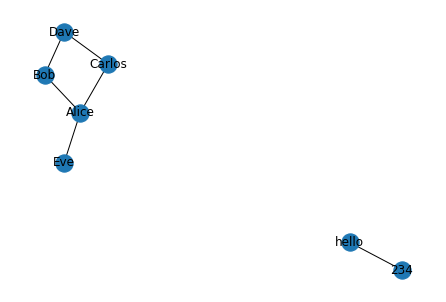

In [ ]:
nx.draw(G, with_labels=True)

## Centrality

https://networkx.org/documentation/networkx-1.10/reference/algorithms.centrality.html

In [ ]:
nx.degree_centrality(G)

{234: 0.16666666666666666,
 'Alice': 0.5,
 'Bob': 0.3333333333333333,
 'Carlos': 0.3333333333333333,
 'Dave': 0.3333333333333333,
 'Eve': 0.16666666666666666,
 'hello': 0.16666666666666666}

In [ ]:
nx.betweenness_centrality(G)

{234: 0.0,
 'Alice': 0.23333333333333334,
 'Bob': 0.06666666666666667,
 'Carlos': 0.06666666666666667,
 'Dave': 0.03333333333333333,
 'Eve': 0.0,
 'hello': 0.0}

# Loading Twitter Data

`corona_tweets.csv` can be found on Quercus. 

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("corona_tweets.csv")

In [ ]:
print("Num of rows:", df.shape[0])

Num of rows: 2550194


In [ ]:
df.head()

date             user  \
0  2020-11-01T04:25:52.000Z  bernadettecomm1   
1  2020-11-01T04:25:52.000Z       bluemeade7   
2  2020-11-01T04:25:52.000Z         _raauull   
3  2020-11-01T04:25:53.000Z   purushothama_n   
4  2020-11-01T04:25:53.000Z       fato_frank   

                                               tweet  
0  RT @ClarkeMicah: Anti-lockdown Letters to MPs ...  
1  RT @petestrzok: RT is registered with the Depa...  
2  RT @essmeraldasauce: COVID cases broke single-...  
3  RT @SadhguruJV: By their very design, most cit...  
4  RT @RealCandaceO: Germany and France go back i...

In [ ]:
df['date']=pd.to_datetime(df['date'].str.slice(0,-5),format='%Y-%m-%dT%H:%M:%S')

In [ ]:
df.head()

date             user  \
0 2020-11-01 04:25:52  bernadettecomm1   
1 2020-11-01 04:25:52       bluemeade7   
2 2020-11-01 04:25:52         _raauull   
3 2020-11-01 04:25:53   purushothama_n   
4 2020-11-01 04:25:53       fato_frank   

                                               tweet  
0  RT @ClarkeMicah: Anti-lockdown Letters to MPs ...  
1  RT @petestrzok: RT is registered with the Depa...  
2  RT @essmeraldasauce: COVID cases broke single-...  
3  RT @SadhguruJV: By their very design, most cit...  
4  RT @RealCandaceO: Germany and France go back i...

## Finding most common hash tags

In [ ]:
from collections import Counter

In [ ]:
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [ ]:
hashTagsCounter.most_common(150)

[('#1', 87335),
 ('#covid19', 75713),
 ('#coronavirus', 21472),
 ('#covid', 13419),
 ('#lockdown', 11150),
 ('#covid_19', 8178),
 ('#covidiots', 6838),
 ('#lockdown2', 6576),
 ('#vote', 6328),
 ('#wewillnotcomply', 6109),
 ('#pandemic', 5692),
 ('#trump', 4568),
 ('#closetheschools', 3860),
 ('#wearamask', 3587),
 ('#marr', 3005),
 ('#breaking', 2942),
 ('#panicbuying', 2796),
 ('#closeschoolsnow', 2678),
 ('#…', 2587),
 ('#excludeduk', 2540),
 ('#nasaanangpangulo', 2532),
 ('#nhs', 2420),
 ('#art', 2340),
 ('#lockdownuk', 2282),
 ('#staysafe', 2199),
 ('#covid19uk', 2110),
 ('#halloween2020', 2096),
 ('#stayhome', 1888),
 ('#votehimout', 1884),
 ('#corona', 1859),
 ('#covid-19', 1824),
 ('#biden', 1811),
 ('#bidenharris2020', 1807),
 ('#wfh', 1786),
 ('#votebluetoendthenightmare', 1767),
 ('#halloween', 1717),
 ('#2ndlockdown', 1656),
 ('#florida', 1564),
 ('#election2020', 1478),
 ('#trumpdeliverednothing', 1408),
 ('#taiwanmodel', 1381),
 ('#trumpvirus', 1372),
 ('#', 1365),
 ('#wor

In [ ]:
# make a new dataframe just with our hashtag
australiaTag = df[df["tweet"].str.lower().str.contains("#australia ", na=False, regex=False)].copy()

In [ ]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [ ]:
australiaTag

date            user  \
3946    2020-11-01 04:29:12  mrgarymatthews   
8807    2020-11-01 04:33:06  mrgarymatthews   
9632    2020-11-01 04:33:48  mrgarymatthews   
10213   2020-11-01 04:34:17  mrgarymatthews   
10866   2020-11-01 04:34:52  mrgarymatthews   
...                     ...             ...   
2528029 2020-11-02 04:09:16      john_m_bps   
2529944 2020-11-02 04:10:36   miragenewscom   
2538297 2020-11-02 04:16:41   miragenewscom   
2543743 2020-11-02 04:20:33   miragenewscom   
2547096 2020-11-02 04:22:57         fmtoday   

                                                     tweet  
3946     @MeidasTouch @sk45202 Rather than this.\n\n#Tr...  
8807     @realDonaldTrump BREAKING: Stanford study esti...  
9632     @EvanMcMullin BREAKING: Stanford study estimat...  
10213    @EricTrump BREAKING: Stanford study estimates ...  
10866    @seanhannity BREAKING: Stanford study estimate...  
...                                                    ...  
2528029  #auspol #Australia  @AlanTudgeMP trying to sel...  
2529944  #Infection control training underway in Wester...  
2538297  2020 Kep Enderby Memorial ... \nhttps://t.co/H...  
2543743  Territory #Tourism Voucher Registrations Comme...  
2547096  The court has ruled that the nightly curfew wa...  

[471 rows x 3 columns]

In [ ]:
australiaTag.iloc[1,2]

'@realDonaldTrump BREAKING: Stanford study estimates Trump rallies resulted in over 30,000 COVID-19 cases and “more than 700 deaths.” \n\n#Trump \n#TrumpViolence response is hopeless and #BatShitCrazy\n\n#Australia \n#auspol https://t.co/pMlW4ky3YM'

In [ ]:
addMentionedColumn(australiaTag)

In [ ]:
australiaTag.head()

date  ...               mentioned
3946  2020-11-01 04:29:12  ...  [meidastouch, sk45202]
8807  2020-11-01 04:33:06  ...       [realdonaldtrump]
9632  2020-11-01 04:33:48  ...          [evanmcmullin]
10213 2020-11-01 04:34:17  ...             [erictrump]
10866 2020-11-01 04:34:52  ...           [seanhannity]

[5 rows x 4 columns]

In [ ]:
# for all the tweets with your hashtag, build the mention graph
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date,user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if mentionedUser in df['user']:
              print(mentionedUser)
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [ ]:
australiaGraph = mentionGraph(australiaTag)

In [ ]:
print("# nodes:", len(australiaGraph.nodes()))
print("# edges:", len(australiaGraph.edges()))

# nodes: 291
# edges: 245


In [ ]:
australiaGraph['mrgarymatthews']

AtlasView({'meidastouch': {'numberMentions': 1}, 'sk45202': {'numberMentions': 3}, 'realdonaldtrump': {'numberMentions': 3}, 'evanmcmullin': {'numberMentions': 1}, 'erictrump': {'numberMentions': 2}, 'seanhannity': {'numberMentions': 1}, 'urocklive1': {'numberMentions': 1}, 'billpascrell': {'numberMentions': 1}, 'skynewsaust': {'numberMentions': 4}, 'mirandadevine': {'numberMentions': 1}, 'rowandean': {'numberMentions': 1}, 'thedailybeast': {'numberMentions': 1}, 'acnewsitics': {'numberMentions': 1}, 'joebiden': {'numberMentions': 2}, 'rbreich': {'numberMentions': 1}, 'npr': {'numberMentions': 1}, 'atrupar': {'numberMentions': 1}, 'ibjeninnola': {'numberMentions': 1}, 'dancrenshawtx': {'numberMentions': 1}, 'jamesmartinsj': {'numberMentions': 1}, 'donaldjtrumpjr': {'numberMentions': 1}, 'eddyjokovich': {'numberMentions': 1}})

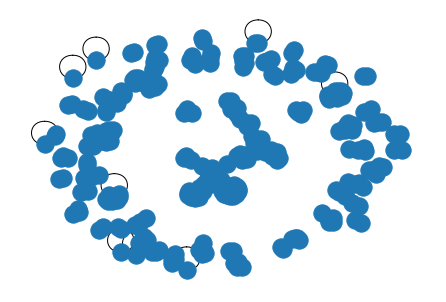

In [ ]:
nx.draw(australiaGraph, with_labels=False)

# Visualize Mention Graph

In [ ]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

### Generate random positions for nodes and store them at property "pos"

In [ ]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [ ]:
addRandomPositions(australiaGraph)

In [ ]:
nx.get_node_attributes(australiaGraph, 'pos')['mrgarymatthews']

(-5.62770156364946, -8.803789626508374)

### Visualize using Plot.ly scatter plots

In [ ]:
def plotNetwork(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=1 ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
australiaGraph.nodes['mrgarymatthews']['pos']

(-5.62770156364946, -8.803789626508374)

In [ ]:
configure_plotly_browser_state()
plotNetwork(australiaGraph)

### Visualize using node size and edge width

In [ ]:
def plotNetworkSize(graph):
    scatters=[]

    # make all the edges
    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)


    # make all the nodes
    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
configure_plotly_browser_state()
plotNetworkSize(australiaGraph)

## Using *Colorlover* for colors

In [ ]:
import colorlover as cl
from IPython.display import HTML

In [ ]:
HTML(cl.to_html( cl.scales['9'] ))

In [ ]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

## Adding color and text based on centrality

In [ ]:
def plotNetworkSizeColor(graph):
    closenessCentr = nx.closeness_centrality(graph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br> Closeness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
configure_plotly_browser_state()
plotNetworkSizeColor(australiaGraph)

## Using NetworkX layouts
https://networkx.org/documentation/stable//reference/drawing.html

In [ ]:
def applyLayout(graph, layoutFunc):
    posDict = layoutFunc(graph) 
    nx.set_node_attributes(graph, name="pos", values=posDict)

### Spring layout

In [ ]:
australiaGraphSpring = australiaGraph.copy()
applyLayout(australiaGraphSpring, nx.spring_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(australiaGraphSpring)

### Random layout

In [ ]:
australiaGraphRandom = australiaGraph.copy()
applyLayout(australiaGraphRandom, nx.random_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(australiaGraphRandom)

### Circular layout

In [ ]:
australiaGraphCircular = australiaGraph.copy()
applyLayout(australiaGraphCircular, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(australiaGraphCircular)

### Spectral layout

In [ ]:
australiaGraphSpectral = australiaGraph.copy()
applyLayout(australiaGraphSpectral, nx.spectral_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(australiaGraphSpectral)

# Complex Sentiment

In [ ]:
from nrclex import NRCLex
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
for index, tweet_data in australiaTag.sample(n=15,random_state=15).iterrows():
  tweet = tweet_data['tweet']
  text_object = NRCLex(tweet)

  relative_numbers = text_object.affect_frequencies
  absolute_numbers = text_object.raw_emotion_scores

  print(tweet)
  print(relative_numbers)
  print(absolute_numbers)
  print("*"*25)

Mask mandates are a breach of the Australian constitution? #COVID19Vic #COVIDIOTS #Melbourne #Australia https://t.co/4bdkVv4Puu
{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'negative': 1.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}
{'negative': 1}
*************************
@NPR In the same day.

BREAKING: Stanford study estimates Trump rallies resulted in over 30,000 COVID-19 cases and “more than 700 deaths.” 

#Trump 
#TrumpViolence response is hopeless and #BatShitCrazy

#CompareThePair

#Canada
#UK
#Australia 
#auspol https://t.co/e7h0xNSf5m
{'fear': 0.25, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.25, 'negative': 0.25, 'sadness': 0.25, 'disgust': 0.0, 'joy': 0.0}
{'positive': 1, 'fear': 1, 'negative': 1, 'sadness': 1}
*************************
International class action lawsuit against the Corona hoax perpetrators: https://t.co/oylBrO90Ad #UK #Australia #IrelandLockdown #waleslockdown #Germany https://